# V1/V2 border and out-of-range border definitions 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch

In [2]:
pic_directory = r'C:/Users/mmill/Documents/STAGE M1/Borders/'

In [3]:
awake_pic = plt.imread(pic_directory+'awake.bmp')
anesthesia_pic = plt.imread(pic_directory+'anesthesia.png')

In [4]:
awake_anot = plt.imread(pic_directory+'awake_annoted.png')
anesthesia_anot = plt.imread(pic_directory+'anesthesia_annoted.tiff')

In [5]:
awake_vasc=np.load(pic_directory+'Awake_vasculature.npy')
anesth_vasc = np.load(pic_directory+'Anesthesia_vasculature.npy')

In [6]:
Nx1, Ny1 = awake_vasc.shape
Nx2, Ny2 = anesth_vasc.shape

In [21]:
awake_anot.shape

(1921, 2306, 4)

In [22]:
awake_pic.shape

(1082, 1312)

## Adapt shapes to match borders from the pics

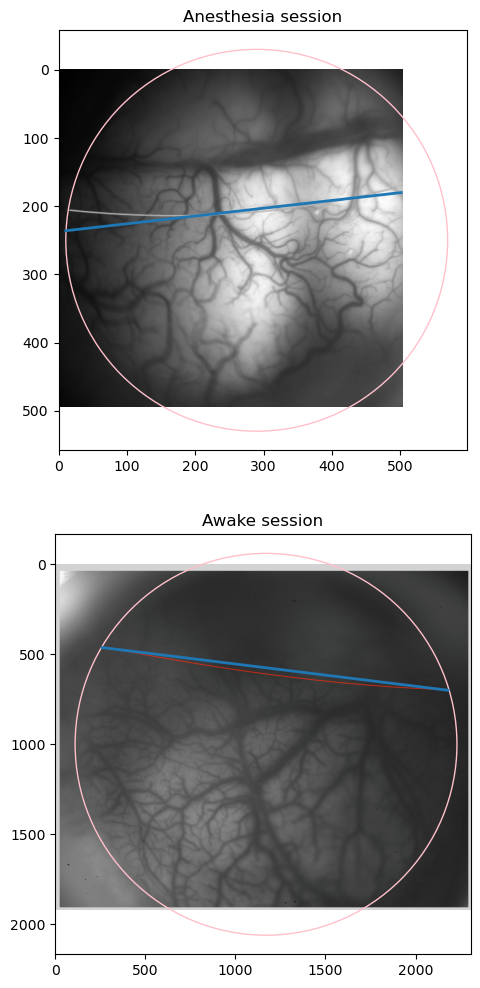

In [23]:
fig, axs = plt.subplots(2,1,figsize=(9,12))
axs[0].set_title('Anesthesia session')
axs[0].imshow(np.rot90(anesthesia_anot,2), 'gray',aspect='equal')
axs[0].plot([502,10],[180,236], linewidth=2)
axs[0].add_patch(patch.Circle((290,250),280,color='pink',fill=False))



axs[1].set_title('Awake session')
axs[1].imshow(awake_anot,aspect='equal')
r=axs[1].plot([261,2180],[463,700], linewidth=2)
axs[1].add_patch(patch.Circle((1170,1000), 1060, color='pink',fill=False))

plt.show()

In [8]:
anesth_conversion = anesthesia_pic.shape[0]/anesth_vasc.shape[0]
awake_conversion=awake_anot.shape[0]/awake_vasc.shape[0]

In [9]:
anesth_line=np.round(np.array([[502,10],[180,236]])/anesth_conversion)
awake_line=np.round(np.array([[261,2180],[463,700]])/awake_conversion)

In [10]:
anesth_line

array([[251.,   5.],
       [ 90., 118.]])

In [11]:
awake_line

array([[ 49., 409.],
       [ 87., 131.]])

In [12]:
anesthesia_circle= np.round(np.array([[290,250],[280,np.nan]])/anesth_conversion)
awake_circle= np.round(np.array([[1170,1000], [1060,np.nan]])/awake_conversion)

In [13]:
anesthesia_circle

array([[145., 125.],
       [140.,  nan]])

In [14]:
awake_circle

array([[219., 187.],
       [199.,  nan]])

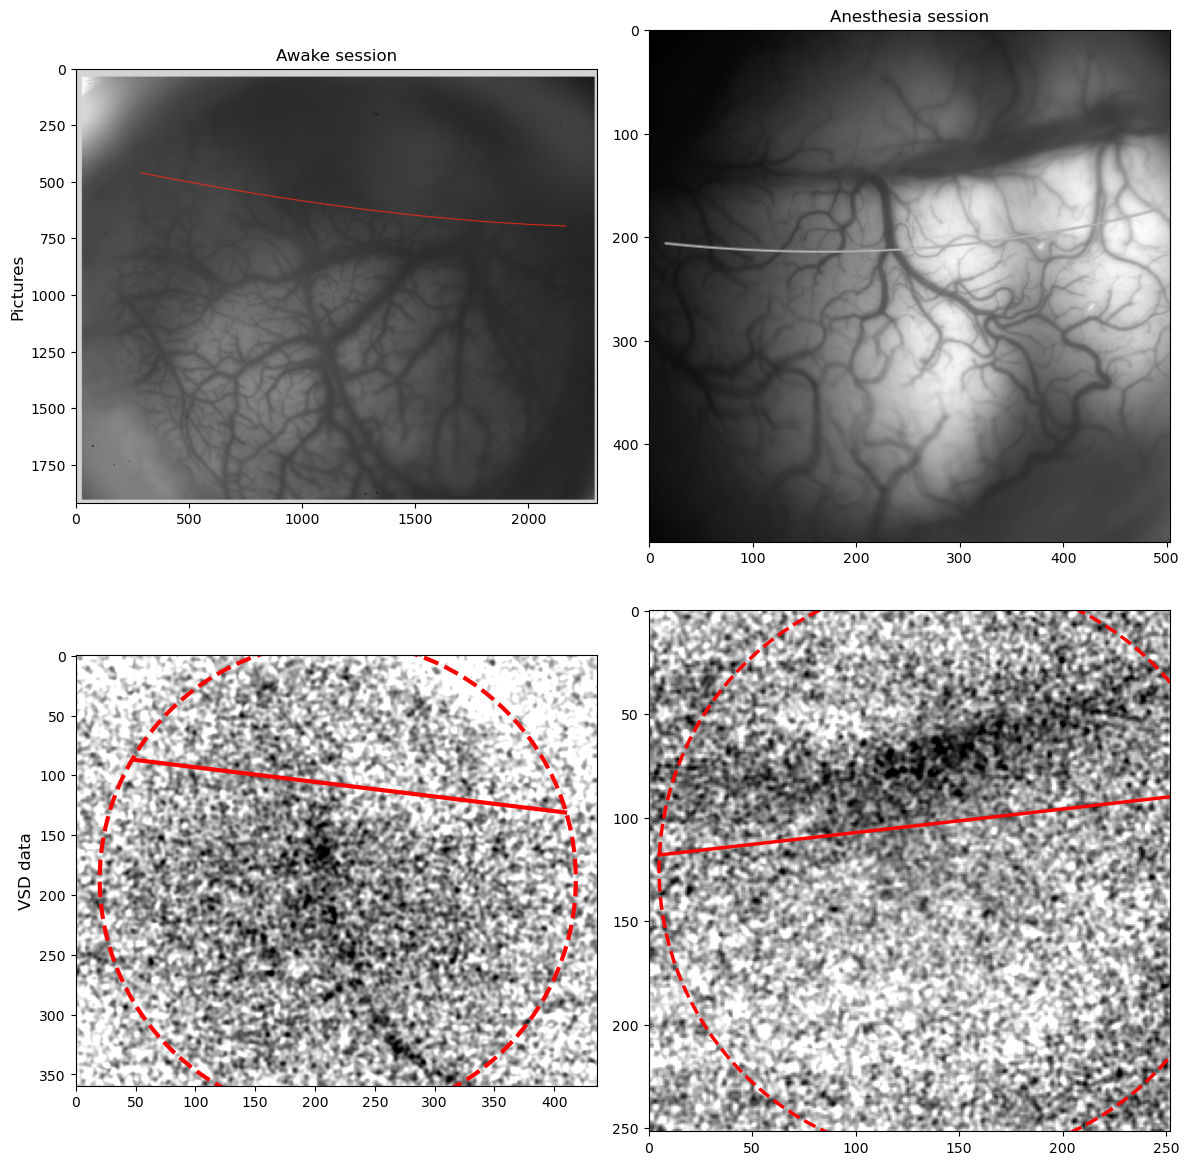

In [15]:
fig1, axs = plt.subplots(2,2,figsize=(12,12),tight_layout=True)

axs[0,0].set_title('Awake session')
axs[0,1].set_title('Anesthesia session')

axs[0,0].set_ylabel('Pictures', size='large')
axs[1,0].set_ylabel('VSD data',  size='large')

axs[0,0].imshow(awake_anot,'gray',aspect='equal')
axs[0,1].imshow(np.rot90(anesthesia_anot,2), 'gray',aspect='equal')

axs[1,0].imshow(awake_vasc,'binary',aspect='equal', vmin=-.25, vmax=.7)
axs[1,1].imshow(np.rot90(anesth_vasc,2), 'binary',aspect='equal', vmin=-.25, vmax=1.2)

axs[1,0].plot(awake_line[0],awake_line[1], linewidth=3, color='r')
axs[1,1].plot(anesth_line[0],anesth_line[1], linewidth=2.5, color='r')

axs[1,0].set_xlim(0,awake_vasc.shape[1])
axs[1,1].set_xlim(0,anesth_vasc.shape[1])

axs[1,0].add_patch(patch.Circle(awake_circle[0], awake_circle[1,0], color='red',fill=False, linewidth=3, linestyle='--'))
axs[1,1].add_patch(patch.Circle(anesthesia_circle[0],anesthesia_circle[1,0],color='red',fill=False, linewidth=2.5, linestyle='--'))

In [16]:
#fig1.savefig('better borders location.png')

## Evaluate pixel_spacing based on the apparent radius of out-of-range border

In [17]:
real_radius=9 #mm

In [18]:
Awake_pixel_spacing = real_radius/awake_circle[1,0]     #0.0566 #mm/px
Anesthesia_pixel_spacing = real_radius/anesthesia_circle[1,0]      #0.0575 #mm/px

In [19]:
Awake_pixel_spacing

0.04522613065326633

In [20]:
Anesthesia_pixel_spacing

0.06428571428571428